# High Pass Filtering di Domain Fourier



High Pass Filtering: Teknik ini berguna untuk mendeteksi tepi atau detail halus dalam citra, sering digunakan dalam deteksi tepi atau penajaman citra.

Efek Samping:

*   Ideal High Pass Filter: Memotong frekuensi rendah secara tajam, sehingga dapat menghasilkan ringing (artefak cincin) di sekitar tepi.

*   Butterworth High Pass Filter: Memotong frekuensi rendah secara bertahap, menghasilkan transisi yang lebih halus dibandingkan Ideal.

*   Gaussian High Pass Filter: Memotong frekuensi rendah dengan kurva Gaussian, memberikan hasil paling halus tanpa ringing yang signifikan.









In [1]:
# Impor library yang diperlukan
import cv2                               # Mengimpor OpenCV untuk pengolahan citra digital
import numpy as np                       # Mengimpor NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Mengimpor Matplotlib untuk visualisasi gambar
from google.colab import files           # Mengimpor modul files untuk mengunggah file di Google Colab

In [2]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin difilter (format .jpg, .png, dll.)")  # Menampilkan instruksi untuk mengunggah gambar
uploaded = files.upload()                # Meminta pengguna mengunggah gambar dan menyimpan hasilnya di variabel uploaded

Unggah gambar yang ingin difilter (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [3]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file dari uploaded (karena uploaded adalah dictionary)
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Memuat gambar dalam mode Grayscale untuk memudahkan transformasi Fourier

In [4]:
# Melakukan transformasi Fourier
f = np.fft.fft2(image)                   # Melakukan transformasi Fourier 2D pada gambar
fshift = np.fft.fftshift(f)              # Menggeser frekuensi nol ke tengah untuk visualisasi yang lebih baik

In [5]:
# Mendapatkan ukuran gambar
rows, cols = image.shape                 # Mendapatkan ukuran gambar (baris dan kolom)
crow, ccol = rows//2, cols//2            # Menentukan pusat gambar

In [6]:
# Fungsi untuk membuat filter Ideal High Pass
def ideal_high_pass_filter(shape, radius):  # Mendefinisikan fungsi untuk filter Ideal High Pass
    mask = np.ones(shape, np.uint8)         # Membuat mask satu (mempertahankan semua frekuensi)
    cv2.circle(mask, (ccol, crow), radius, 0, -1)  # Membuat lingkaran berisi 0 di tengah mask (menghilangkan frekuensi rendah)
    return mask

In [7]:
# Fungsi untuk membuat filter Butterworth High Pass
def butterworth_high_pass_filter(shape, radius, n):  # Mendefinisikan fungsi untuk filter Butterworth High Pass
    u = np.arange(shape[0]) - crow         # Membuat grid koordinat u (baris)
    v = np.arange(shape[1]) - ccol         # Membuat grid koordinat v (kolom)
    uu, vv = np.meshgrid(v, u)             # Membuat grid 2D dari u dan v
    d = np.sqrt(uu**2 + vv**2)             # Menghitung jarak dari pusat
    mask = 1 / (1 + (radius / d)**(2*n))   # Rumus filter Butterworth High Pass (dibagi radius)
    mask[d == 0] = 0                       # Menghindari pembagian oleh nol di pusat
    return mask

In [8]:
# Fungsi untuk membuat filter Gaussian High Pass
def gaussian_high_pass_filter(shape, radius):  # Mendefinisikan fungsi untuk filter Gaussian High Pass
    u = np.arange(shape[0]) - crow         # Membuat grid koordinat u (baris)
    v = np.arange(shape[1]) - ccol         # Membuat grid koordinat v (kolom)
    uu, vv = np.meshgrid(v, u)             # Membuat grid 2D dari u dan v
    d = np.sqrt(uu**2 + vv**2)             # Menghitung jarak dari pusat
    mask = 1 - np.exp(-(d**2) / (2 * (radius**2)))  # Rumus filter Gaussian High Pass
    return mask

In [9]:
# Parameter filter
radius = 30                              # Radius untuk filter Ideal, Butterworth, dan Gaussian
n = 2                                    # Orde untuk filter Butterworth

In [10]:
# Membuat mask filter
ideal_mask = ideal_high_pass_filter((rows, cols), radius)  # Membuat mask Ideal High Pass
butterworth_mask = butterworth_high_pass_filter((rows, cols), radius, n)  # Membuat mask Butterworth High Pass
gaussian_mask = gaussian_high_pass_filter((rows, cols), radius)  # Membuat mask Gaussian High Pass

<ipython-input-7-0973a2ce53a0>:7: RuntimeWarning: divide by zero encountered in divide
  mask = 1 / (1 + (radius / d)**(2*n))   # Rumus filter Butterworth High Pass (dibagi radius)


In [11]:
# Menerapkan filter pada spektrum frekuensi
fshift_ideal = fshift * ideal_mask       # Menerapkan filter Ideal High Pass
fshift_butterworth = fshift * butterworth_mask  # Menerapkan filter Butterworth High Pass
fshift_gaussian = fshift * gaussian_mask  # Menerapkan filter Gaussian High Pass

In [12]:
# Melakukan inverse transformasi Fourier untuk setiap filter
def apply_inverse_fourier(fshift_filtered):  # Mendefinisikan fungsi untuk inverse transformasi Fourier
    f_ishift = np.fft.ifftshift(fshift_filtered)  # Mengembalikan shift frekuensi
    image_filtered = np.fft.ifft2(f_ishift)  # Melakukan inverse transformasi Fourier 2D
    image_filtered = np.abs(image_filtered)  # Mengambil magnitude (nilai absolut)
    return image_filtered

In [13]:
image_ideal = apply_inverse_fourier(fshift_ideal)  # Mendapatkan citra hasil filter Ideal High Pass
image_butterworth = apply_inverse_fourier(fshift_butterworth)  # Mendapatkan citra hasil filter Butterworth High Pass
image_gaussian = apply_inverse_fourier(fshift_gaussian)  # Mendapatkan citra hasil filter Gaussian High Pass


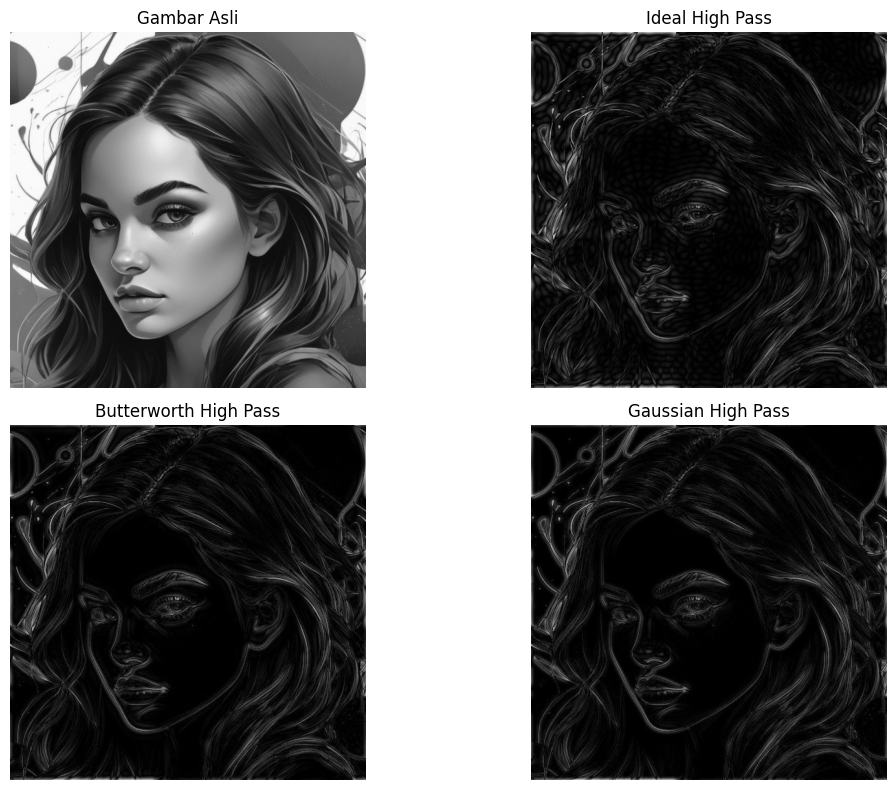

In [14]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(12, 8))              # Membuat figure dengan ukuran 12x8 inci untuk menampung empat gambar

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot di posisi 1 (2 baris, 2 kolom)
plt.imshow(image, cmap='gray')           # Menampilkan gambar asli dalam skala abu-abu
plt.title('Gambar Asli')                 # Menambahkan judul 'Gambar Asli'
plt.axis('off')                          # Menghilangkan sumbu

# Gambar Ideal High Pass
plt.subplot(2, 2, 2)                     # Membuat subplot di posisi 2
plt.imshow(image_ideal, cmap='gray')     # Menampilkan gambar hasil filter Ideal High Pass
plt.title('Ideal High Pass')             # Menambahkan judul 'Ideal High Pass'
plt.axis('off')                          # Menghilangkan sumbu

# Gambar Butterworth High Pass
plt.subplot(2, 2, 3)                     # Membuat subplot di posisi 3
plt.imshow(image_butterworth, cmap='gray')  # Menampilkan gambar hasil filter Butterworth High Pass
plt.title('Butterworth High Pass')       # Menambahkan judul 'Butterworth High Pass'
plt.axis('off')                          # Menghilangkan sumbu

# Gambar Gaussian High Pass
plt.subplot(2, 2, 4)                     # Membuat subplot di posisi 4
plt.imshow(image_gaussian, cmap='gray')  # Menampilkan gambar hasil filter Gaussian High Pass
plt.title('Gaussian High Pass')          # Menambahkan judul 'Gaussian High Pass'
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame